# Lecture 5 –Fall 2024

A demonstration of advanced `pandas` syntax to accompany Lecture 4.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

## Dataset: California baby names

In today's lecture, we'll work with the `babynames` dataset, which contains information about the names of infants born in California.

The cell below pulls census data from a government website and then loads it into a usable form. The code shown here is outside of the scope of Data 100, but you're encouraged to dig into it if you are interested!

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # If the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


## Case Study: Name "Popularity"

#**Case Study Question**
**Title**: Identifying the Most Consistently Popular Female Baby Name Over Time

Objective:
In this exercise, we will analyze the dataset to find the female baby name that has shown the most consistent popularity over the years. This involves filtering the data, calculating the consistency of name counts, and determining the most stable name.



# Instructions:

**Data** Preparation:

Filter the dataset to only include entries where the sex is "F" (female).
Calculate Consistency:

For each name, calculate the standard deviation of the counts over the years. A lower standard deviation indicates more consistent popularity.
**Identify Most Consistent Name:**

Determine the name with the lowest standard deviation in counts, signifying the most consistent popularity.


In [3]:
#Answer Here
f_baby_names=babynames[babynames["Sex"]=="F"]

In [4]:
std=f_baby_names.groupby("Name")[["Count"]].agg("std")
std=std.dropna()
#std

In [6]:
std.min()

Count    0.0
dtype: float64

In [6]:
std.idxmin()

Count    Aaleah
dtype: object

In [5]:
std.idxmax()

Count    Jessica
dtype: object

In [10]:
std.sort_values(by="Count")

,Count
Name,
Suriah,0.000000
Lavanya,0.000000
Alyzza,0.000000
Lavena,0.000000
Lavera,0.000000
...,...
Lisa,1440.945074
Ashley,1574.630360
Linda,1592.083532


In [13]:
babynames[babynames["Name"]=="Aaleah"]

,State,Sex,Year,Name,Count
192984,CA,F,2010,Aaleah,5
209047,CA,F,2014,Aaleah,5
216904,CA,F,2016,Aaleah,5


In [16]:
std.loc[["Aaleah"]]

,Count
Name,
Aaleah,0.0


In [92]:
np.array(std["Count"])

array([ 1.92353841, 14.62971536,  7.72765596, ...,  4.10284454,
        6.76163419,  0.5       ])

In [93]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

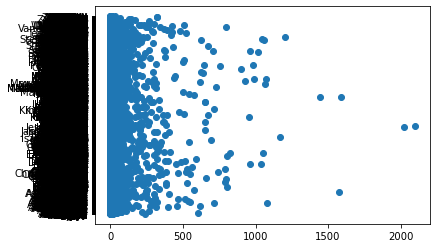

In [103]:
plt.scatter ( np.array(std["Count"]) , np.array(std.index)  )
plt.show()

In [104]:
plt.line ( np.array(std["Count"]) , np.array(std.index)  )

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'